In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/OASIS INFOBYTE/sales prediction/Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# DATASET ANALYSIS FOR OUTLIERS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


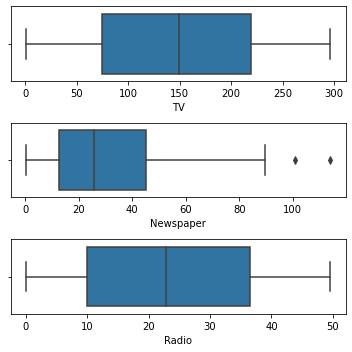

In [7]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

# EXPLORATORY DATA ANALYSIS 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


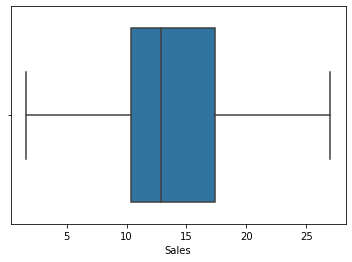

In [8]:
sns.boxplot(df['Sales'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


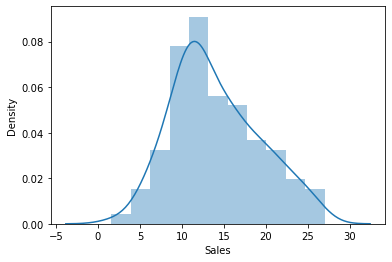

In [9]:
sns.distplot(df['Sales']);

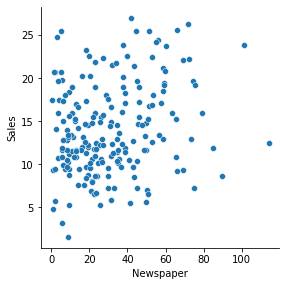

In [10]:
sns.pairplot(df, x_vars=['Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

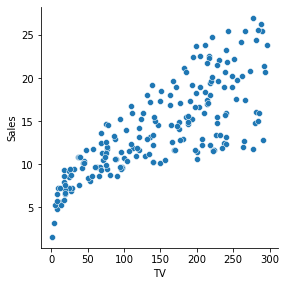

In [11]:
sns.pairplot(df, x_vars=['TV'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show() 

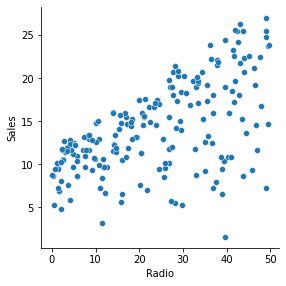

In [12]:
sns.pairplot(df, x_vars=['Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [13]:
corr=df.corr()

<AxesSubplot:>

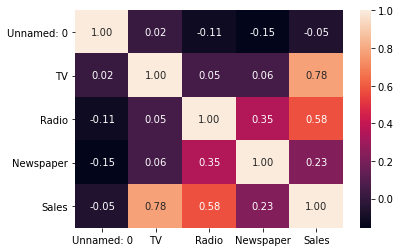

In [14]:
sns.heatmap(corr, annot=True, fmt=".2f")

In [15]:
## featue and Target

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
     

# SPLITING THE DATA AS IN TRAIN 80% AND TEST 20%

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y , test_size = 0.2, random_state = 42)     

# TRAINING THE MODEL 

In [17]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression( fit_intercept = True)
model_LR.fit(X_train, y_train)

LinearRegression()

In [18]:
print(f"Linear coefficients : {model_LR.coef_}")
print(f"Intercept : {model_LR.intercept_}")

Linear coefficients : [0.00064359 0.04471835 0.18925118 0.00304577]
Intercept : 2.9065270863618053


In [19]:
y_pred = model_LR.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
print("Accuracy : ",r2_score(y_test,y_pred)*100)

Accuracy :  89.8648915141708


# ACCURACY OF THE ADVERTISING IS 89.86%